# MODEL PROJECT - OLG MODEL 

We choose to look at an OLG model and an exspansion where we increase the population growth. 

**The structure of this modelproject:**
1. We write up the model that we are looking at as well as the necessary constraints
2. We solve the model analytically using Sympy.solve
3. We solve the model numerically using optimize
4. We create a simulation of the model and plot the simulation
5. We look at the case where the population growth is increasing and find the new steady state value and create a new plot of the simulation

Imports and set magics:

In [1]:
import numpy as np
from scipy import optimize
import sympy as sm
from types import SimpleNamespace

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

import ipywidgets as widgets

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# Model description

We consider a two period OLG model where we include an Euler equation. 

**Firms maximization problem:**
$$
\max_{K_t, L_t}  AK_t^{\alpha}L_t^{1-\alpha} - r_t K_t - w_t L_t
$$

$L_t$ and $K_t$ is the labor and capital employed by a firm. $A$ is the total factor productivity and must be greater than 0. $\alpha \in (0,1)$ and is the percentage of capital the consumer uses in their production process.

**Production function:** $\newline$
We use a Cobb Douglas production function:
$$
Y_t = AK_t^{\alpha}L_t^{1-\alpha} 
$$

$L_t$ shows how many individuals are born in period t. The population grows a at constant rate, n:
$$
L_t = L_{t-1}(1+n)
$$

The capital accumulation in the next period is equal to the savings from this period:
$$
K_{t+1} = S_t = s_tL_t
$$
It is only the young who save.

**Capital per capita:**
$$
k_t = \frac{K_t}{L_t}
$$

In period $t+1$ aggregate capital stock is equal to what the young people save, what the old people dissave and un-depreciated capital ($\delta = 0$):
$$
k_{t+1}(1+n) = s_t 
$$


**Saving problem for an individual:**
$$
U_t = ln(c_{1t})+\beta ln(c_{2t+1})
$$
$c_{1t}$ is consumption when young and $c_{2t+1}$ is consumption when old. 

**Parameter expression:**
$$
\beta = \frac{1}{1+\rho}
$$
$\rho$ is the discount rate and must be larger than $-1$, such that $\beta>0$.

**Budget constraints:**
$$
c_{1t} + s_t = w_t 
$$

$$
c_{2t+1} = (1 + r_{t+1}) s_t
$$
$w_t$ is defined as the wage rate and $r_{t+1}$ is the interest rate between $t$ and $t+1$.
$\newline$
The consumption for young is equal to their wage minus savings. 
$\newline$
Since old agents do not work, they must provide consumption through savings which are remunerated at the gross rate, $(1 + r_{t+1})$.  

**Lifetime budget constraint:** $\newline$
By combining consumption when young and consumption when old, we yield the **lifetime budget constraint:**
$$
c_{1t} + \frac{c_{2t+1}}{1+r_{t+1}} = w_t 
$$
The old cannot make any choices and must therefore consume their wealth. 
$\newline$
We assume $\delta = 0$ meaning zero depreciation. By solving the firms' maximization problem we get factor prices for $r_t$ and $w_t$:
$$
r_t = A \alpha k_t^{\alpha-1}
$$

$$
w_t = A(1-\alpha)k_t^\alpha
$$

In order to derive the Euler equation, ie. solving the household problem, we use the Lagrangian to find FOC's. Then we can substitute out the Lagrangian multiplier to get the Euler equation.

**The Euler equation:**
$$
c_{2t+1} = \frac{1+r_{t+1}}{1+\rho}c_{1t}
$$

By combining the budget constraints with the Euler equation, we are able to find the optimal savings. 
$$
s_t = \frac{1}{2+\rho}w_t
$$

Remember that $k_{t+1} (1+n) = s_t$. By inserting the factor price for wage, we get the capital accumulation per capita. 

**Capital accumulation per capita:**
$$
k_{t+1}(1+n) = \frac{1}{2+\rho}w_t
$$

$$
k_{t+1}(1+n) = \frac{1}{2+\rho}A(1-\alpha)k_t^\alpha
$$

$$
k_{t+1} = \frac{A(1-\alpha)k_t^\alpha}{(1+n)(2+\rho)}
$$

In steady state $k_{t+1} = k_t = k^*$ yielding:

**Steady state:**
$$
k^* = \bigr[\frac{A(1-\alpha)}{(1+n)(2+\rho)}\bigr]^\frac{1}{1-\alpha}
$$





## Analytical solution

First step is to solve the model analytically if possible. 

We start of by defining the parameters we use in our function using Sympy. 

Afterwards, we solve for $k^*$ in our capital accumulation function derived above.

Lastly, we turn our function into a python function using Sympy.lambdify.

In [2]:
# Defining parameters as symbols
alpha = sm.symbols('alpha')
A = sm.symbols('A')
k = sm.symbols('k')
rho = sm.symbols('rho')
n = sm.symbols('n')
tau = sm.symbols('tau')

In [3]:
# Solving for steady state using Sympy.solve
steady_state = sm.Eq(k, (A*(1-alpha)*k**alpha)/((1+n)*(2+rho)))
kss = sm.solve(steady_state, k)[0]
kss 

(A*(1 - alpha)/(n*rho + 2*n + rho + 2))**(-1/(alpha - 1))

The expression above is the solution for the steady state. If we rearrange the expression we will obtain the following expression for steady state:
$$
k^* = \bigr[\frac{A(1-\alpha)}{(1+n)(2+\rho)}\bigr]^\frac{1}{1-\alpha}
$$

In [4]:
# Turning our function into a python function using Sympy.lambdify
ss_func = sm.lambdify((rho,A,alpha,n,tau),kss)
ss_func(0.03, 1.00, 0.30, 0.05, 0.00)

0.20377974025150472

We find that when solving analytically the value of steady state is $k^* = 0.204$.

## Numerical solution

We start of by defining the values of the parameters. We optimize algorithms using the bisect method. 

In [5]:
# Setting parameters
rho = 0.03
A = 1.00
alpha = 0.30
n = 0.05
tau = 0.00

ks_1 = ((A*(1-alpha))/((1+n)*(2+rho)))**(-1/(alpha-1))

In [6]:
# Defining the objective
obj = lambda k: k - ((A*(1-alpha)*k**alpha)/((1+n)*(2+rho)))

# Optimizing the model and finding the roots
result = optimize.root_scalar(obj,bracket=[1e-10,10],method='bisect') 
result.root

0.20377974025128476

From the giving values of the parameters we find that steady state, $k^*$, is equal to 0.204. $\newline$
It follows that $k_{t+1}$ is a concave function of $k_t$, which means that there will be a unique steady state and we will converge to it. 

In [7]:
# The following code is for the start of the simulation of the model. 
from modelproject import modelclass

model = modelclass()

par = model.par
sim = model.sim

model.sim_results()

initializing the model:
calling .setup()
calling .allocate()
initializing the model:
calling .setup()
calling .allocate()
Consumption by old people in period t = 0 sim.C2[0] =  0.250
Consumption by young in period t = 0 sim.C1[0] =  0.210
Consumption by old people in period t sim.C2[1] =  0.313
Consumption by young people in period t sim.C1[1] =  0.241
euler-error = -2.168
simulation done in 0.013 secs
euler error after model has been simulated 3.2216451728572792e-12


We see that both young and old consume more in period t compared to period 0. The old consume more than the young in both periods. 

The Euler error is -2.17 before simulation and 0.00 after simulating the model. The Euler error shows how close the Euler approximation is to the true result. The model is therefore more correct after simulation than before. Furthermore, we see that there is convergence. 

simulation done in 0.013 secs


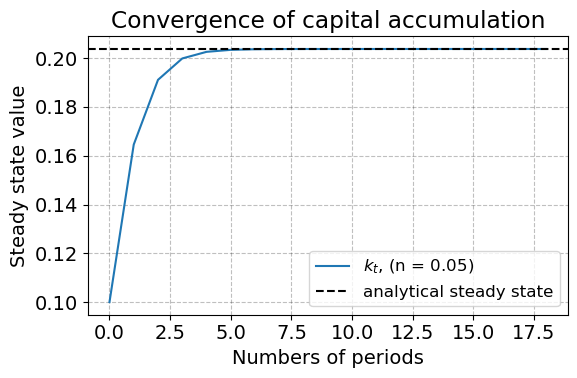

In [8]:
# a. Calling our simulation and storing new variables 
model.simulate()

# b. Plotting the simulation
fig = plt.figure(figsize=(6,6/1.5))
ax = fig.add_subplot(1,1,1)
ax.plot(model.sim.k,label=r'$k_{t}$, (n = 0.05)') # Plotting k
ax.axhline(ks_1,ls='--',color='black',label='analytical steady state') # Plotting the analytical steady state
ax.legend(frameon=True,fontsize=12)
ax.set_title('Convergence of capital accumulation')
ax.set_xlabel('Numbers of periods')
ax.set_ylabel('Steady state value')
fig.tight_layout()
sim_k_old = model.sim.k.copy() # Creating a copy of the steady state simulation for later

From the plot we see, that the analytical steady state is a little higher than 0.20, which is the same as the analytical solution found earlier in the assignment. Furthermore, we see that the capital accumulation converges towards steady state and that it takes approximatly 6 simulations. 

# Further analysis

We now want to expand our model where we look at different rates for population growth (n). Before we had a population growth rate of 0.05, and we now try to set this to 0.10 instead, when doing the plot for the simulation. $\newline$
Furthermore, we want to see how the steady state changes when creating a loop with different values of n. We look at n for the range of 0.00 to 0.10. 

In [9]:
# Setting n
ns = [0.00, 0.03, 0.05, 0.07, 0.09, 0.10]

# Creating an empty list to store the values of steady state
solution = []

# Creating a loop and optimizing using bisect method
for n in ns: 
    f_a = lambda k1: ((1-alpha)*k1**alpha)/((1+n)*(2+rho))
    f_b = lambda k3: k3 - f_a(k3)
    res = optimize.root_scalar(f_b,bracket=[1e-10,10],method='bisect') 
    solution.append(res.root)
    print(f'Population grotwh at {n:}: = {res.root :.3f}')

Population grotwh at 0.0: = 0.218
Population grotwh at 0.03: = 0.209
Population grotwh at 0.05: = 0.204
Population grotwh at 0.07: = 0.198
Population grotwh at 0.09: = 0.193
Population grotwh at 0.1: = 0.191


We see from this simulation that as the population growth is increasing the steady state value of capital accumulation will decrease. This is also in accordance with what we expect since when the population is growing there is more people who are to share the capital. 

The same effect is also possible shown in the following figure where we see a negative effect on steady state from an increasing population growth. 

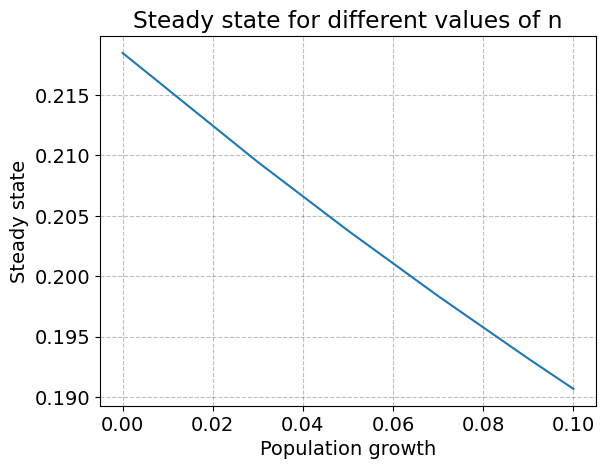

In [10]:
# Creating figure
def plot_n():
    fig = plt.figure()

    # Creating the plot
    ax = fig.add_subplot(1,1,1)

    ax.plot(ns, solution)

    # Add labels and title
    ax.set_title('Steady state for different values of n')
    ax.set_xlabel('Population growth')
    ax.set_ylabel('Steady state')

# Print
plot_n()

From the plot above we see that as the population growth is increasing the value of the steady state is decreasing.

We now want to see how the simulation changes when n is no longer equal to 0.05, but instead equal to 0.10. Therefore, we do one more simulation where we are able to see both the old simulation as well as the new simulation for different values of n. 

In [11]:
par.production_function = 'cobb-douglas'

# Setting n to a new value
par.n = 0.10

# New analytical steady state
ks_2 = ss_func(0.03, 1.00, 0.30, 0.10, 0.00) 

model.simulate()

simulation done in 0.012 secs


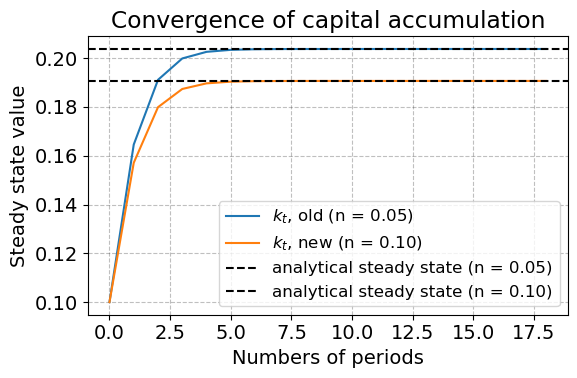

In [12]:
# Creating the simulation plot
fig = plt.figure(figsize=(6,6/1.5))
ax = fig.add_subplot(1,1,1)
ax.plot(sim_k_old,label=r'$k_{t}$, old (n = 0.05)') # Plotting the old k
ax.plot(model.sim.k,label=r'$k_{t}$, new (n = 0.10)') # Plotting the new k
ax.axhline(ks_1,ls='--',color='black',label='analytical steady state (n = 0.05)') # Plotting the old analytical steady state
ax.axhline(ks_2,ls='--',color='black',label='analytical steady state (n = 0.10)') # Plotting the new analytical steady state
ax.set_title('Convergence of capital accumulation')
ax.set_xlabel('Numbers of periods')
ax.set_ylabel('Steady state value')
ax.legend(frameon=True,fontsize=12)
fig.tight_layout()

From the plot above we see that when n is increasing the analytical steady state is decreasing. Furthermore, we see that even though the population growth is increasing and the steady state value is decreasing it takes approximatly the same time for capital accumulation to convert to the analytical steady state value. 

# Conclusion

First we find that it is possible to find the steady state of capital accumulation numerically as well as analytically. In both cases we obtain a steady state value 0.204. $\newline$
We then look at the case where to population growth is increasing. This results in a decrease in the steady state value of capital accumulation to 0.191, when $n = 0.10$. This is also shown in the simulation where we see that steady state will convert to a lower analytical steady state value. 